<font color = green>

# Linear Regression: Ridge, Lasso, Normal Equation, Polynomial
</font>

<font color = green >

### Set interactive backend 
</font>

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

<font color = green >

### Load boston data set 
</font>

In [3]:
from sklearn.datasets import load_boston

In [18]:
def get_X_y(features= None, verbose= False):
    X, y = load_boston(return_X_y=True)

    if features is None:
        print ('Selecting all features')
        
    elif type(features) == int or (type(features) == list and len(features)==1):
        print ('Selecting one feature: {}'.format(features))
        X= X[:,features].reshape(-1,1) # single column 
    elif type(features) == list: 
        print ('Selecting features list: {}'.format(features))
        X= X[:,features]
    else: 
        print ('wrong format of parameter "features"')
        return


    X_train, X_test, y_train, y_test=  train_test_split(X, y, random_state=2021)
    if verbose:
        print ('X_train.shape= ',X_train.shape)
        print ('y_train.shape= ',y_train.shape)
        print ('X_train [:5] = \n{}'.format(X_train[:5]))
        print ('y_train [:5] = \n{}'.format(y_train[:5]))
    return X_train, X_test, y_train, y_test

In [19]:
# X_train, X_test, y_train, y_test=  get_X_y(5, verbose= True)

In [15]:
# X, y = load_boston(return_X_y=True)
# # X= X[:,[5,7,-3,-1]]
# df = pd.DataFrame (X)
# df['target'] = y
# pd.plotting.scatter_matrix(df);
# plt.savefig('scatter_matrix.png')

In [16]:
# %%html
# <img src = "img/scatter_matrix.png" height=500 width= 500 align="left">

In [20]:
X_train, X_test, y_train, y_test=  get_X_y(verbose= True)
# X_train, X_test, y_train, y_test=  get_X_y([5],verbose= False)

Selecting all features
X_train.shape=  (379, 13)
y_train.shape=  (379,)
X_train [:5] = 
[[6.53876e+00 0.00000e+00 1.81000e+01 1.00000e+00 6.31000e-01 7.01600e+00
  9.75000e+01 1.20240e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.92050e+02
  2.96000e+00]
 [1.87000e-02 8.50000e+01 4.15000e+00 0.00000e+00 4.29000e-01 6.51600e+00
  2.77000e+01 8.53530e+00 4.00000e+00 3.51000e+02 1.79000e+01 3.92430e+02
  6.36000e+00]
 [9.82349e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.71000e-01 6.79400e+00
  9.88000e+01 1.35800e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.96900e+02
  2.12400e+01]
 [8.98296e+00 0.00000e+00 1.81000e+01 1.00000e+00 7.70000e-01 6.21200e+00
  9.74000e+01 2.12220e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.77730e+02
  1.76000e+01]
 [1.54450e-01 2.50000e+01 5.13000e+00 0.00000e+00 4.53000e-01 6.14500e+00
  2.92000e+01 7.81480e+00 8.00000e+00 2.84000e+02 1.97000e+01 3.90680e+02
  6.86000e+00]]
y_train [:5] = 
[50.  23.1 13.3 17.8 23.3]


<font color = green >

### Linear Regression

</font>

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
regressor = lin_reg
print ('Linear Regression')
print ('R2 train score =', regressor.score(X_train, y_train))
print ('R2 test score =', regressor.score(X_test, y_test))
print ('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

Linear Regression
R2 train score = 0.7574040454723427
R2 test score = 0.6444830064046849
b: 34.63352365795066, 
w= [-1.27421498e-01  4.99114338e-02  1.05071184e-02  3.72805249e+00
 -1.72676176e+01  3.78675485e+00  1.35124646e-02 -1.47750709e+00
  3.51385233e-01 -1.23215025e-02 -8.91018698e-01  1.04112328e-02
 -6.07027919e-01]


<font color = green >

### Ridge

</font>

In [22]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge()
ridge_reg.fit(X_train,y_train)
regressor = ridge_reg
print ('Ridge')
print ('R2 train score =', regressor.score(X_train, y_train))
print ('R2 test score =', regressor.score(X_test, y_test))
print ('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

Ridge
R2 train score = 0.7552425063699494
R2 test score = 0.6407115466888994
b: 28.797817860948463, 
w= [-1.23594936e-01  5.10971227e-02 -2.37302225e-02  3.41520298e+00
 -9.46749120e+00  3.86558526e+00  6.02474819e-03 -1.36719840e+00
  3.33657589e-01 -1.27967058e-02 -7.94224473e-01  1.09928550e-02
 -6.19736036e-01]


<font color = green >

### Lasso

</font>

In [23]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)
regressor = lasso_reg
print ('Lasso')
print ('R2 train score =', regressor.score(X_train, y_train))
print ('R2 test score =', regressor.score(X_test, y_test))
print ('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

Lasso
R2 train score = 0.7009242031533497
R2 test score = 0.5965217324629268
b: 39.17817695691221, 
w= [-0.08397128  0.05634176 -0.          0.         -0.          0.96581164
  0.03647805 -0.68471062  0.31973217 -0.01543873 -0.65888717  0.00948135
 -0.86866346]


<font color = green >

### Comparing to KNN

</font>

In [24]:
X_train, X_test, y_train, y_test=  get_X_y()

from sklearn.neighbors import KNeighborsRegressor
print ('KNN')
for n_neighbors in range(1,10):
    regressor = KNeighborsRegressor(n_neighbors=n_neighbors).fit (X_train,y_train)
    print ('n_neighbors={}'.format (n_neighbors))
    print ('R2 train score =', regressor.score(X_train, y_train))
    print ('R2 test score =', regressor.score(X_test, y_test))

Selecting all features
KNN
n_neighbors=1
R2 train score = 1.0
R2 test score = 0.3981060291217753
n_neighbors=2
R2 train score = 0.8505462783476003
R2 test score = 0.48450912540613245
n_neighbors=3
R2 train score = 0.7734707793567664
R2 test score = 0.5409334869501738
n_neighbors=4
R2 train score = 0.7422778033707116
R2 test score = 0.5676445965450929
n_neighbors=5
R2 train score = 0.7069411577058329
R2 test score = 0.5206620552149527
n_neighbors=6
R2 train score = 0.6745702802927206
R2 test score = 0.5232235412972984
n_neighbors=7
R2 train score = 0.6390556854167992
R2 test score = 0.5338204295317496
n_neighbors=8
R2 train score = 0.6155931600070736
R2 test score = 0.5132926939002168
n_neighbors=9
R2 train score = 0.5920657447568448
R2 test score = 0.4944555131755196


<font color = green >

## Normal Equation

</font>

In [25]:
X_train, X_test, y_train, y_test=  get_X_y()
m,n = X_train.shape
# adding 1-column
X_train_ext =  np.c_[(np.ones((m,1)),X_train)]
assert (X_train_ext.shape== (m,n+1))

print ('Solving linear regression using normal equation...')

params = np.linalg.pinv (X_train_ext.T @ X_train_ext ) @ X_train_ext.T @ y_train


params = np.linalg.pinv (X_train_ext.T @ X_train_ext ) @ X_train_ext.T @ y_train
b = params[0]
w=params[1:].reshape (1,-1) 
print ('b: {}, \nw= {}'.format(b,w)) 

print ('Predicting using normal equation...')

z_train= b+ X_train @ w.T
z_test= b+ X_test @ w.T

from sklearn.metrics import r2_score
print ('R2 train score =',  r2_score(y_train,z_train))
print ('R2 test score =', r2_score(y_test,z_test))

Selecting all features
Solving linear regression using normal equation...
b: 34.63352365971641, 
w= [[-1.27421498e-01  4.99114338e-02  1.05071184e-02  3.72805249e+00
  -1.72676176e+01  3.78675485e+00  1.35124646e-02 -1.47750709e+00
   3.51385233e-01 -1.23215025e-02 -8.91018698e-01  1.04112328e-02
  -6.07027919e-01]]
Predicting using normal equation...
R2 train score = 0.7574040454723427
R2 test score = 0.6444830064054423


<font color = green >

## Polynomial

</font>

In [26]:
from sklearn.preprocessing import PolynomialFeatures

<font color = green >

### Polynomial + Linear Regression

</font>

In [27]:
X_train, X_test, y_train, y_test=  get_X_y()

poly= PolynomialFeatures(degree=2,include_bias=False) # default is True means to return the first feature of all 1 as for degree 0 
X_train_poly= poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print ('X_train.shape= ',X_train.shape)
print ('X_train_poly.shape= ',X_train_poly.shape)
# X_train_poly[:5]
poly_lin_reg = LinearRegression().fit (X_train_poly,y_train)
regressor = poly_lin_reg
print ('Polynomial + Linear Regression')
print ('R2 train score =', regressor.score(X_train_poly, y_train))
print ('R2 test score =', regressor.score(X_test_poly, y_test))
print ('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

Selecting all features
X_train.shape=  (379, 13)
X_train_poly.shape=  (379, 104)
Polynomial + Linear Regression
R2 train score = 0.9385641470053719
R2 test score = 0.7885009947001587
b: -140.77500985987913, 
w= [ 6.52991959e-02  3.54085909e-01 -3.50622661e+00  3.64381048e+01
  1.41060068e+02  1.57319409e+01  8.37202237e-01 -7.69009871e+00
  1.11338357e+00 -9.85821756e-02  6.33851116e+00  9.46418801e-02
  5.92520421e-01  2.93097947e-03  1.75105811e-01  4.45181610e-01
  1.96281767e+00 -8.30100732e-01  5.58786088e-02 -4.73420480e-03
 -6.52786854e-02  5.41856924e-01 -4.45134662e-02  4.21317818e-01
 -2.25258464e-04  2.35040396e-02 -3.12610951e-04 -1.88195458e-03
 -5.62309180e-02 -1.18208456e+00  1.80827395e-02  3.99661924e-04
 -1.13147098e-02 -5.07908962e-03  6.64612462e-04 -7.06294429e-03
  2.58586820e-04 -6.53319971e-03  5.54018376e-02  4.45280423e-01
  1.00243193e+00  2.46363726e-01  4.59870806e-03  1.00815503e-01
 -7.19861388e-03  5.65468937e-04 -5.40103690e-02  1.70978109e-03
 -2.67075

#### Note: the R2 scores on training and test  show it is overfitting
Though it is better that w/o poly

In [29]:
# Try with normalization

from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test=  get_X_y(verbose= False)

poly= PolynomialFeatures(degree=2,include_bias=False) # default is True means to return the first feature of all 1 as for degree 0 
X_train_poly= poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print ('X_train.shape= ',X_train.shape)
print ('X_train_poly.shape= ',X_train_poly.shape)

scaler= StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled= scaler.transform(X_test_poly)
# X_train_poly[:5]
poly_lin_reg = LinearRegression().fit (X_train_poly_scaled,y_train)
regressor = poly_lin_reg
print ('Polynomial + Normalization + Linear Regression')
print ('R2 train score =', regressor.score(X_train_poly_scaled, y_train))
print ('R2 test score =', regressor.score(X_test_poly_scaled, y_test))
print ('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

Selecting all features
X_train.shape=  (379, 13)
X_train_poly.shape=  (379, 104)
Polynomial + Normalization + Linear Regression
R2 train score = 0.9385641470053722
R2 test score = 0.7885009947454351
b: 22.59630606860151, 
w= [ 6.08522336e-01  8.43824668e+00 -2.46561192e+01  8.87434624e+00
  1.70217408e+01  1.11742852e+01  2.31767666e+01 -1.63375723e+01
  9.84117077e+00 -1.68609410e+01  1.39467112e+01  8.77160083e+00
  4.17742177e+00  1.70282805e+00  4.12768804e-01  7.53095095e+01
  1.69854536e+00 -5.21950641e+00  3.15176538e+00 -4.21898058e+00
 -9.74051535e-01  1.22152906e+02 -2.77484997e+02  7.94110267e+01
 -6.67142072e-01  4.74918451e+00 -5.88741586e-01 -1.55600317e-01
 -3.40629669e-01 -1.17284029e+01  2.98085494e+00  3.31898414e-01
 -2.02067463e+00 -4.70419842e-01  4.76911930e+00 -2.79720891e+00
  2.39991125e+00 -9.92833476e-01  9.72618774e+00  1.60548822e+00
  5.22041903e+00  1.03220525e+01  3.42742748e+00  1.46048835e+00
 -1.28304301e+00  2.77122314e+00 -7.59463451e+00  4.52046877

<font color = green >

### Polynomial + Ridge

</font>

In [42]:
X_train, X_test, y_train, y_test=  get_X_y(verbose= False)

poly= PolynomialFeatures(degree=2,include_bias=False) # default is True means to return the first feature of all 1 as for degree 0 
X_train_poly= poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print ('X_train.shape= ',X_train.shape)
print ('X_train_poly.shape= ',X_train_poly.shape)

poly_ridge = Ridge(alpha=1e6, max_iter=1e5).fit (X_train_poly,y_train) # Increased max-iter and alpha
regressor = poly_ridge
print ('Polynomial + Ridge')

print ('R2 train score =', regressor.score(X_train_poly, y_train))
print ('R2 test score =', regressor.score(X_test_poly, y_test))
w= regressor.coef_
# print ('b: {}, \nw= {}'.format(regressor.intercept_, w)) 

Selecting all features
X_train.shape=  (379, 13)
X_train_poly.shape=  (379, 104)
Polynomial + Ridge
R2 train score = 0.8652923117171691
R2 test score = 0.7382237190179701


<font color = green >

#### Try polynomial degree = 3 for Ridge 

</font>

In [66]:
poly= PolynomialFeatures(degree=3,include_bias=False) # default is True means to return the first feature of all 1 as for degree 0 
X_train_poly= poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print ('X_train.shape= ',X_train.shape)
print ('X_train_poly.shape= ',X_train_poly.shape)

poly_ridge = Ridge(alpha=5e10, max_iter=100000).fit (X_train_poly,y_train)
regressor = poly_ridge
print ('Polynomial + Ridge')

print ('R2 train score =', regressor.score(X_train_poly, y_train))
print ('R2 test score =', regressor.score(X_test_poly, y_test))
w= regressor.coef_

# print ('b: {}, \nw= {}'.format(regressor.intercept_, w)) 

X_train.shape=  (379, 13)
X_train_poly.shape=  (379, 559)
Polynomial + Ridge
R2 train score = 0.9120223744181684
R2 test score = 0.7479618936728503


In [67]:
# Looks like it is dos not work well for this case 

<font color = green >

### Polynomial + Lasso

</font>

In [72]:
X_train, X_test, y_train, y_test=  get_X_y(verbose= False)

poly= PolynomialFeatures(degree=3,include_bias=False) # default is True means to return the first feature of all 1 as for degree 0 
X_train_poly= poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print ('X_train.shape= ',X_train.shape)
print ('X_train_poly.shape= ',X_train_poly.shape)

poly_lasso = Lasso(max_iter=100000).fit (X_train_poly,y_train)
regressor = poly_lasso
print ('Polynomial + Lasso')
print ('R2 train score =', regressor.score(X_train_poly, y_train))
print ('R2 test score =', regressor.score(X_test_poly, y_test))

w= regressor.coef_
print ('b: {}, \nw= {}'.format(regressor.intercept_, w)) 
w_relevant= w[np.abs(w) > 1e-2]
print ('\nRelevant w= {}'.format(w_relevant)) 



Selecting all features
X_train.shape=  (379, 13)
X_train_poly.shape=  (379, 559)
Polynomial + Lasso
R2 train score = 0.9733271299572992
R2 test score = 0.48350042852816744
b: 26.41366526187976, 
w= [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  1.65558840e-03  0.00000000e+00
  5.70614469e-04 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -9.45334766e-04
  0.00000000e+00  0.00

/Users/otsebriy/opt/anaconda3/envs/ot_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 586.7178930202115, tolerance: 3.462195482849604
  positive)


<font color = green >

#### Try polynomial degree = 3  for Lasso

</font>

In [71]:
poly= PolynomialFeatures(degree=3,include_bias=False) # default is True means to return the first feature of all 1 as for degree 0 
X_train_poly= poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print ('X_train.shape= ',X_train.shape)
print ('X_train_poly.shape= ',X_train_poly.shape)

poly_lasso = Lasso(alpha= 10, max_iter=1000000).fit (X_train_poly,y_train)
regressor = poly_lasso
print ('Polynomial + Lasso')
print ('R2 train score =', regressor.score(X_train_poly, y_train))
print ('R2 test score =', regressor.score(X_test_poly, y_test))

w= regressor.coef_
# print ('b: {}, \nw= {}'.format(regressor.intercept_, w)) 
w_relevant= w[np.abs(w) > 1e-2]
print ('\nRelevant w= {}'.format(w_relevant)) 

X_train.shape=  (379, 13)
X_train_poly.shape=  (379, 559)
Polynomial + Lasso
R2 train score = 0.9586800104435999
R2 test score = 0.6544595023249842

Relevant w= []


/Users/otsebriy/opt/anaconda3/envs/ot_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 862.230941116662, tolerance: 3.462195482849604
  positive)


<font color = green >

### Check learning square function 

</font>

True params:
b: 12, 
w= [[-5  3]]
Computed params:
b: [12.00027576], 
w= [[-4.99963245  2.99999797]]


<IPython.core.display.Javascript object>


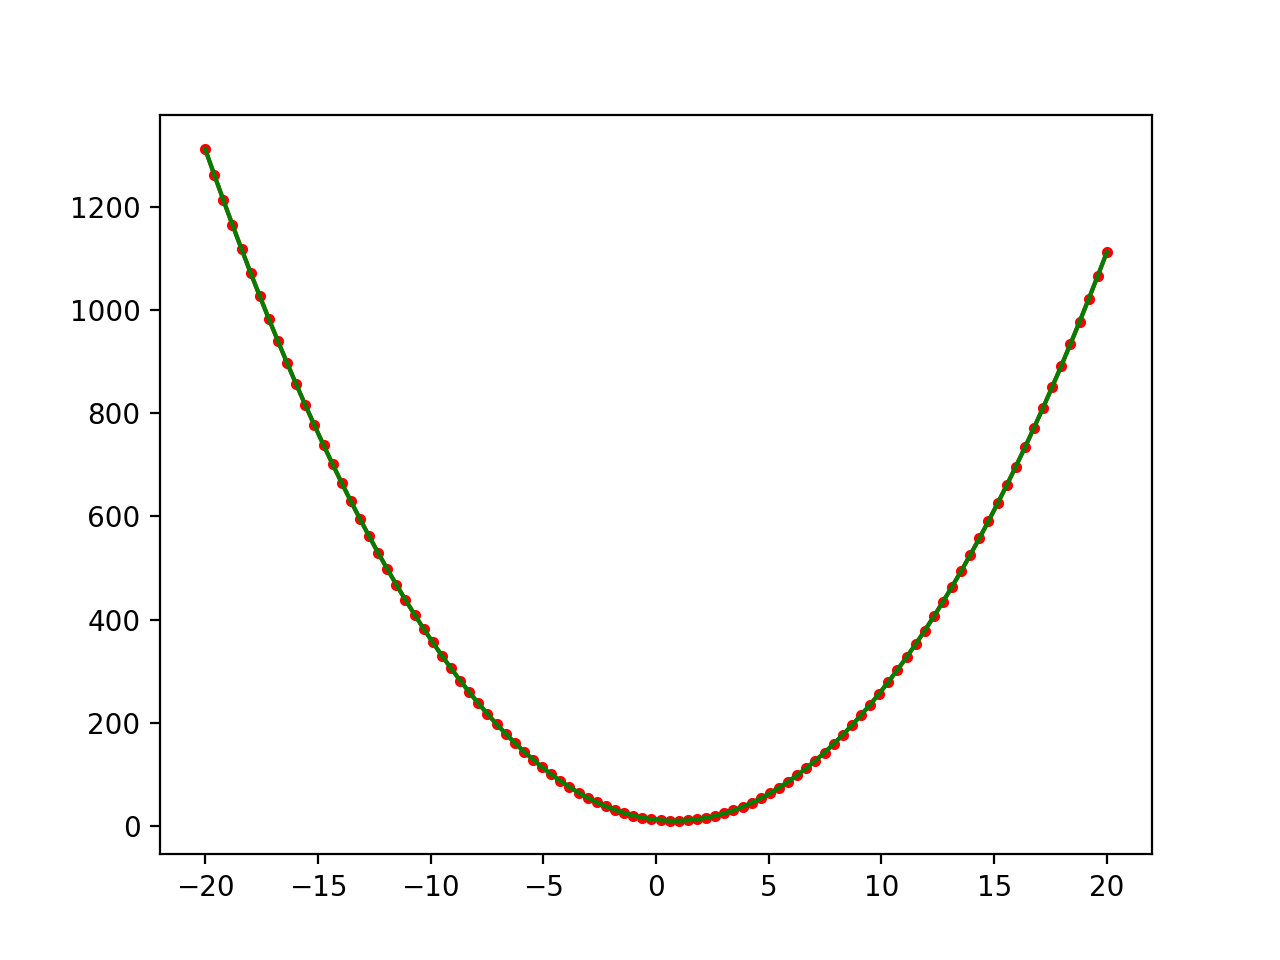

In [23]:
X_train= np.linspace(-20,20,100).reshape(-1,1)

b_true= 12
w_true=np.array([-5,3]).reshape(1,-1)
poly= PolynomialFeatures(degree=2,include_bias=False)
X_train_poly= poly.fit_transform(X_train)

y_train = b_true +  X_train_poly @ w_true.T

lin_reg = Ridge().fit(X_train_poly, y_train)
regressor = lin_reg
print ('True params:\nb: {}, \nw= {}'.format(b_true, w_true)) 
print ('Computed params:\nb: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

z= lin_reg.predict(X_train_poly)

plt.plot (X_train,y_train,c='r',marker='.')
plt.plot (X_train,z,c='g') 

In [24]:
# Note: It just overlaps the true params curve

<font color = green >

### Check learning polynomial on sin  

</font>

<IPython.core.display.Javascript object>


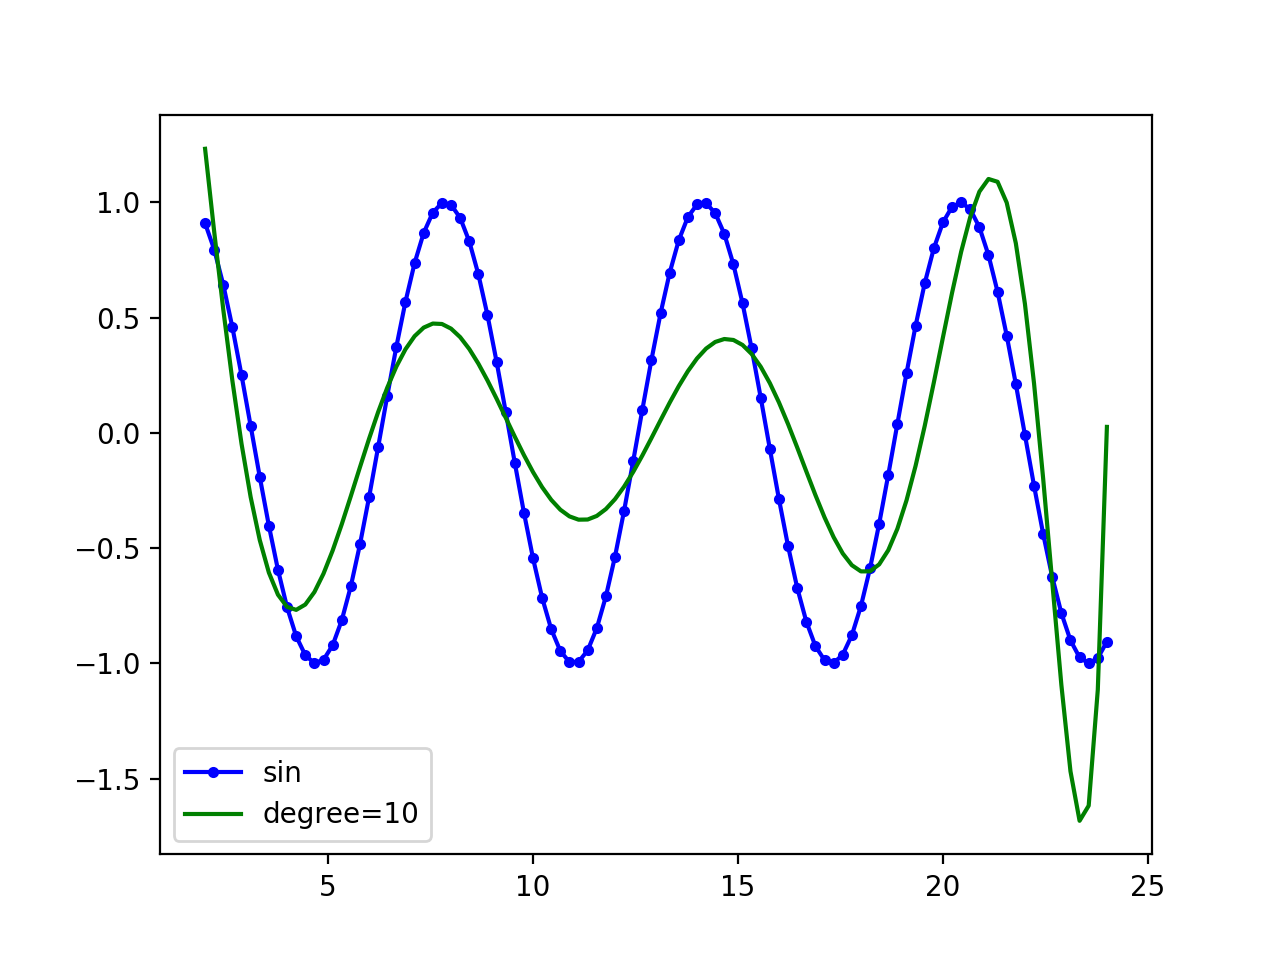

Degree = 10, R2 train score = 0.6443662864520947


/Users/otsebriy/opt/anaconda3/envs/ot_env/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.12467e-29): result may not be accurate.
  overwrite_a=True).T


In [75]:
X_train= np.linspace(2,24,100).reshape(-1,1)

# b_true= 5
# w_true=np.array([-10,4,3]).reshape(1,-1)
# poly= PolynomialFeatures(degree=3,include_bias=False)
# X_train_poly= poly.fit_transform(X_train)
# y_train = b_true +  X_train_poly @ w_true.T
y_train = np.sin(X_train)

plt.figure()
plt.plot (X_train,y_train,c='blue',marker='.',label='sin')

for degree in [10]: #,2, 4,5,6,10]:

    X_train_poly= PolynomialFeatures(degree=degree,include_bias=False).fit_transform(X_train)
    lin_reg = Ridge().fit(X_train_poly, y_train)
    regressor = lin_reg
    print ('Degree = {}, R2 train score = {}'.format(degree, regressor.score(X_train_poly, y_train)))
#     print ('Computed params:\nb: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

    z= lin_reg.predict(X_train_poly)
    plt.plot (X_train,z, label='degree={}'.format(degree), color= 'g')
plt.legend() 

# Home Task 

Use diabetes dataset (`sklearn.datasets.load_diabetes`) and apply
 - Ridge 
 - Lasso
 - Polynomial
